In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
from joblib import dump, load
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import load_breast_cancer 
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from sklearn.model_selection import KFold

In [3]:
data=load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X=data.data
y=data.target

In [6]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [8]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)), ## l2-->düzenlileştirme işlemi

    BatchNormalization(),  ##aktivasyonları standartlaştırıyor. Eğitim süresini kısaltır. 
    
    Dropout(0.5), #Nöronların rastgele söndürülmesini sağlar. Aşırı bağımlılığı engeleer.

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),

    BatchNormalization(),
    
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy","AUC"])

In [10]:
callbacks=EarlyStopping(
    monitor="val_loss", ## Hangi krtitere göre durduracaksın ona karar verir.
    patience=10,  #Yazan iterasyona kadar çalıştır. (Minimum)
    verbose=1,
    restore_best_weights=True
)

model_checkpoint=ModelCheckpoint(
    'model.keras',
    monitor="val_loss",
    verbose=1,
    save_best_only=True
)

In [11]:
history=model.fit(X_train,
                  y_train,
                  epochs=1000,
                  batch_size=32,
                  validation_data=(X_val,y_val),
                  verbose=2,
                  callbacks=[callbacks,model_checkpoint]
                  )

Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.73886, saving model to model.keras
15/15 - 3s - 199ms/step - AUC: 0.6668 - accuracy: 0.6308 - loss: 0.8147 - val_AUC: 0.9826 - val_accuracy: 0.3947 - val_loss: 0.7389
Epoch 2/1000

Epoch 2: val_loss improved from 0.73886 to 0.70724, saving model to model.keras
15/15 - 0s - 8ms/step - AUC: 0.8326 - accuracy: 0.7670 - loss: 0.5670 - val_AUC: 0.9933 - val_accuracy: 0.4298 - val_loss: 0.7072
Epoch 3/1000

Epoch 3: val_loss improved from 0.70724 to 0.66015, saving model to model.keras
15/15 - 0s - 9ms/step - AUC: 0.9167 - accuracy: 0.8484 - loss: 0.4362 - val_AUC: 0.9956 - val_accuracy: 0.5877 - val_loss: 0.6602
Epoch 4/1000

Epoch 4: val_loss improved from 0.66015 to 0.62357, saving model to model.keras
15/15 - 0s - 9ms/step - AUC: 0.9356 - accuracy: 0.8659 - loss: 0.3890 - val_AUC: 0.9959 - val_accuracy: 0.6228 - val_loss: 0.6236
Epoch 5/1000

Epoch 5: val_loss improved from 0.62357 to 0.57074, saving model to model.keras
15/15 - 0s -

In [12]:
def plot_training_history(history,train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    # Loss grafiği
    plt.figure(figsize=(12, 5))
    plt.plot(history.history[train_loss], label='Eğitim Loss', marker='o')
    plt.plot(history.history[val_loss], label='Doğrulama Loss', marker='o')
    plt.title('Eğitim ve Doğrulama Kayıp Değerleri')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Accuracy grafiği
    if 'accuracy' in history.history:
        plt.figure(figsize=(12, 5))
        plt.plot(history.history[train_metric], label='Eğitim Accuracy', marker='o')
        plt.plot(history.history[val_metric], label='Doğrulama Accuracy', marker='o')
        plt.title('Eğitim ve Doğrulama Doğruluk Değerleri')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

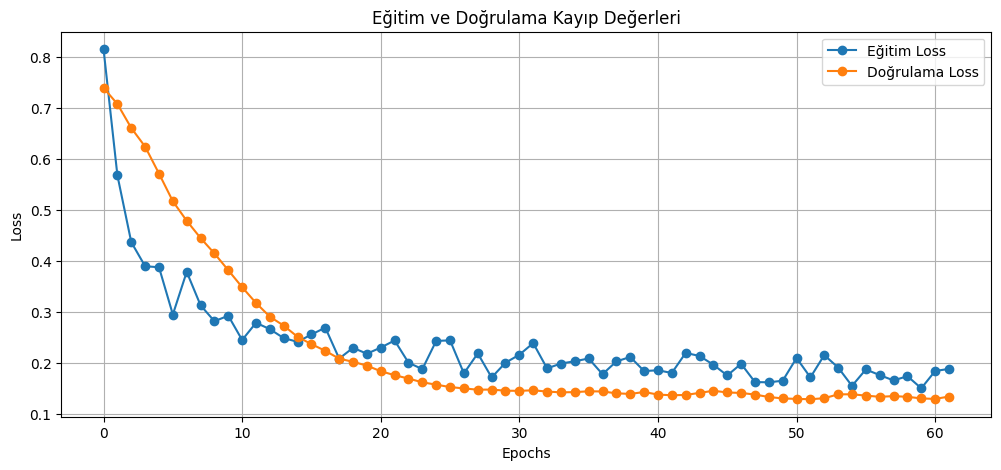

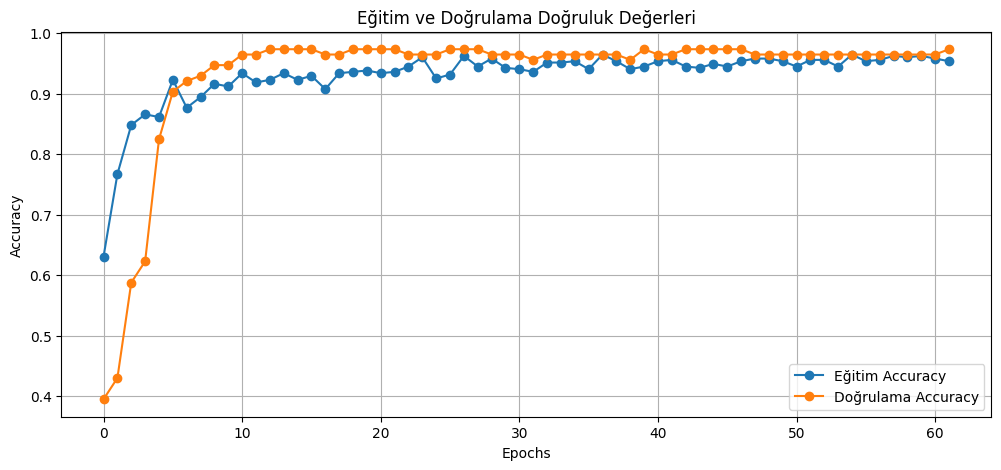

In [13]:
plot_training_history(history)

In [14]:
result=model.evaluate(X_val,y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9971 - accuracy: 0.9558 - loss: 0.1427 


In [15]:
loss=result[0]
acc=result[1]
auc=result[2]

In [16]:
print(f"Loss:{loss}")
print(f"Accuracy:{acc}")
print(f"AUC:{auc}")

Loss:0.12814471125602722
Accuracy:0.9649122953414917
AUC:0.9973796010017395
